In [1]:
%load_ext autoreload
%autoreload 2

# Demo
##### This is a demo for testing and training U_TITAN.

In [2]:
import os
import matplotlib.pyplot as plt
import torch
import numpy as np
import time
from U_TITAN import *
from tools import *


###  Parameters

In [5]:

# Hyperparameters

T = 10000
K = 20
N = 20

input_dim = N * N * K + K * K * N
N_updates_W = 10
N_updates_C = 1

num_layers = 31

learning_rate = 1e-2
dataset_size = 500
num_epochs = 20
train_batch_size = 32

## Model parameters

gamma_c = 1
gamma_w = 0.99
eps = 1e-12
nu = 0.5
zeta = 1e-3 


learning_mode = 'with_inertial'


## 1- Train a model


### 1.1- Training conditions

In [6]:
training_mode = 'end-to-end'
training_name = f'learning_alpha_K{K}_N{N}_num_layers{num_layers}_learning_mode_{learning_mode}'
#learning_mode = 'coefficients'


path_testset       = '/workspace/TITAN/Unrolled-TITAN/TITAN_Unrolled/Datasets/test'
path_trainset      = '/workspace/TITAN/Unrolled-TITAN/TITAN_Unrolled/Datasets/train'
path_valset        = '/workspace/TITAN/Unrolled-TITAN/TITAN_Unrolled/Datasets/val'
path_save          = os.path.join('Trainings', training_name)
folders            = [path_testset,path_trainset,path_valset, path_save]


if not os.path.exists(path_save):
    os.makedirs(path_save)

print('--------------------------------------------------------------------------------------------------------------------------------')
print('Training : %s'%(training_name))
print('Training mode: %s'%(training_mode))
print('Trained model will be saved in %s.'%(path_save))
print('--------------------------------------------------------------------------------------------------------------------------------')

--------------------------------------------------------------------------------------------------------------------------------
Training : learning_alpha_K20_N20_num_layers31_learning_mode_with_inertial
Training mode: end-to-end
Trained model will be saved in Trainings/learning_alpha_K20_N20_num_layers31_learning_mode_with_inertial.
--------------------------------------------------------------------------------------------------------------------------------


In [7]:
        
network = U_TITAN(folders, training_mode, T, K, N, input_dim, learning_rate, N_updates_W, N_updates_C, num_epochs, train_batch_size, dataset_size, num_layers, gamma_c, gamma_w, eps, nu, zeta, learning_mode)
network.train()

=================== End-to-end training ===================
Epoch 1/20, training loss: 0.0450
Epoch 1/20, validation loss: 0.0237
Epoch 2/20, training loss: 0.0147
Epoch 2/20, validation loss: 0.0080
Epoch 3/20, training loss: 0.0080
Epoch 3/20, validation loss: 0.0071
Epoch 4/20, training loss: 0.0075
Epoch 4/20, validation loss: 0.0070
Epoch 5/20, training loss: 0.0071
Epoch 5/20, validation loss: 0.0069


KeyboardInterrupt: 

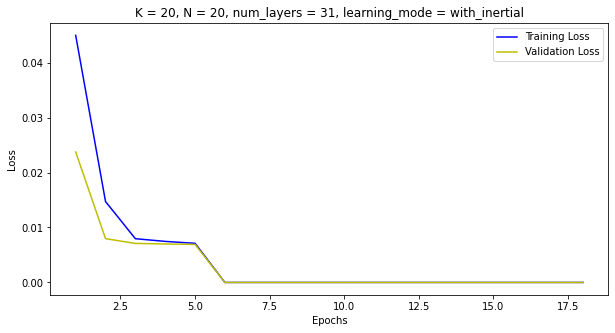

In [8]:
# Train and Validation Loss

isi_train = network.isi_train[:18]
isi_val = network.isi_val[:18]

epochs = range(1, len(isi_train) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, isi_train, 'b', label='Training Loss')
plt.plot(epochs, isi_val, 'y', label='Validation Loss')
plt.title('K = %d, N = %d, num_layers = %d, learning_mode = %s'%(K, N, num_layers, learning_mode))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
for name, param in network.model.named_parameters():
    if param.grad is None:
        print(f"Parameter '{name}' has no gradient")
    else:
        pass
        print(f"Parameter '{name}' gradient mean: {param.grad.mean().item()}") 
        print(f"Parameter '{name}' value: {param.mean().item()}")

Parameter 'Layers.0.alpha' gradient mean: 9.999999974752427e-07
Parameter 'Layers.0.alpha' value: 0.1135062575340271
Parameter 'Layers.0.gamma_w' gradient mean: 9.999999974752427e-07
Parameter 'Layers.0.gamma_w' value: 0.5669910311698914
Parameter 'Layers.0.gamma_c' gradient mean: -9.999999974752427e-07
Parameter 'Layers.0.gamma_c' value: 0.38013145327568054
Parameter 'Layers.0.beta_w' gradient mean: 9.999999974752427e-07
Parameter 'Layers.0.beta_w' value: 0.033808037638664246
Parameter 'Layers.0.beta_c' gradient mean: 0.0
Parameter 'Layers.0.beta_c' value: 0.010699803940951824
Parameter 'Layers.1.alpha' gradient mean: 9.999999974752427e-07
Parameter 'Layers.1.alpha' value: -0.03318449854850769
Parameter 'Layers.1.gamma_w' gradient mean: 9.999999974752427e-07
Parameter 'Layers.1.gamma_w' value: 0.6149901747703552
Parameter 'Layers.1.gamma_c' gradient mean: 9.999999974752427e-07
Parameter 'Layers.1.gamma_c' value: 0.5906985998153687
Parameter 'Layers.1.beta_w' gradient mean: 9.999999974

In [10]:
# Stocker les valeurs de alpha, gamma_w et gamma_c pour chaque couche
alpha_values = []
gamma_w_values = []
gamma_c_values = []
beta_w_values = []
beta_c_values = []

def softplus(x):
    return np.log(1 + np.exp(x))

def tanh(x):
    return np.tanh(x)

for name, param in network.named_parameters():
    if 'alpha' in name:
        alpha_values.append(softplus(param.clone().detach().cpu().numpy()))
    elif 'gamma_w' in name:
        gamma_w_values.append(0.3 + 2 * tanh(param.clone().detach().cpu().numpy() + 1))
    elif 'gamma_c' in name:
        gamma_c_values.append(0.3 + 2 * tanh(param.clone().detach().cpu().numpy() + 1))
    elif 'beta_w' in name: 
        beta_w_values.append(softplus(param.clone().detach().cpu().numpy()))
    elif 'beta_c' in name:
        beta_c_values.append(softplus(param.clone().detach().cpu().numpy()))
        

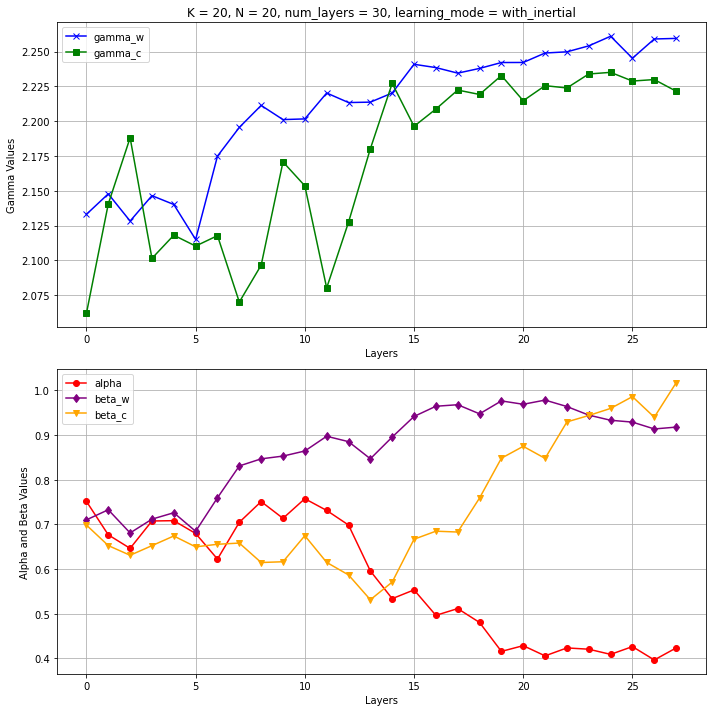

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Convertir en numpy arrays pour la visualisation
alpha_values = np.array(alpha_values)[:-1]  # Remove last element
gamma_w_values = np.array(gamma_w_values)[:-1]  # Remove last element
gamma_c_values = np.array(gamma_c_values)[:-1]  # Remove last element
beta_w_values = np.array(beta_w_values)[:-1]  # Remove last element
beta_c_values = np.array(beta_c_values)[:-1]  # Remove last element

# Nombre de couches (excluding the last layer)
layers = np.arange(len(alpha_values))

# Création du graphique avec 2 sous-graphiques
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Graphique 1: gamma_w et gamma_c
axs[0].plot(layers, gamma_w_values, label='gamma_w', color='blue', marker='x')
axs[0].plot(layers, gamma_c_values, label='gamma_c', color='green', marker='s')
axs[0].set_xlabel('Layers')
axs[0].set_ylabel('Gamma Values')
axs[0].set_title('K = %d, N = %d, num_layers = %d, learning_mode = %s'%(K, N, num_layers - 1, learning_mode))
axs[0].legend()
axs[0].grid(True)

# Graphique 2: alpha, beta_w, et beta_c
axs[1].plot(layers, alpha_values, label='alpha', color='red', marker='o')
axs[1].plot(layers, beta_w_values, label='beta_w', color='purple', marker='d')
axs[1].plot(layers, beta_c_values, label='beta_c', color='orange', marker='v')
axs[1].set_xlabel('Layers')
axs[1].set_ylabel('Alpha and Beta Values')
axs[1].legend()
axs[1].grid(True)

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()



## 1- Test saved models
### 1.1- Test conditions

In [19]:
training_model_to_test = f'learning_alpha_K{K}_N{N}_num_layers{num_layers}_learning_mode_{learning_mode}'

path_testset       = '/workspace/TITAN/Unrolled-TITAN/TITAN_Unrolled/Datasets/test'
path_trainset      = '/workspace/TITAN/Unrolled-TITAN/TITAN_Unrolled/Datasets/train'
path_valset        = '/workspace/TITAN/Unrolled-TITAN/TITAN_Unrolled/Datasets/val'
path_save          = os.path.join('Trainings', training_model_to_test)
folders            = [path_testset,path_trainset,path_valset, path_save]



### 1.2- Hyperparameters setting
##### Choose 'yes' to save the learned parameters values (regularization parameter), 'no' else.

In [20]:
save_parameters = 'yes' 
print('--------------------------------------------------------------------------------------------------------------------------------',flush=True)
if save_parameters == 'yes':
    
    save_parameters = os.path.join(path_save,'Results_on_Testsets')
    if not os.path.exists(save_parameters):
        os.makedirs(save_parameters)
    print('The regularization parameter will be saved for each layer at location \n%s'%(save_parameters))
else:
    print('The stepsize, barrier parameter and regularization parameter will not be saved') 
print('--------------------------------------------------------------------------------------------------------------------------------',flush=True)


--------------------------------------------------------------------------------------------------------------------------------
The regularization parameter will be saved for each layer at location 
Trainings/learning_alpha_K20_N20_num_layers31_learning_mode_with_inertial/Results_on_Testsets
--------------------------------------------------------------------------------------------------------------------------------


### 1.4- Load a model

In [21]:
mode = 'test'
#learning_mode = 'coefficients'
learning_mode = 'with_inertial'
test_batch_size = 1 

network = U_TITAN(folders, mode, T, K, N, input_dim, learning_rate, N_updates_W, N_updates_C, num_epochs, test_batch_size, dataset_size, num_layers, gamma_c, gamma_w, eps, nu, zeta, learning_mode)
path_layers = os.path.join(path_save,'best_val.pth')
network.model.load_state_dict(torch.load(path_layers))

print('--------------------------------------------------------------------------------------------------------------------------------',flush=True)
print('Loaded U_TITAN layers from %s.'%(path_layers))
print('--------------------------------------------------------------------------------------------------------------------------------',flush=True)


--------------------------------------------------------------------------------------------------------------------------------
Loaded U_TITAN layers from Trainings/learning_alpha_K20_N20_num_layers31_learning_mode_with_inertial/best_val.pth.
--------------------------------------------------------------------------------------------------------------------------------


### 1.5- Test a model

In [22]:
print('--------------------------------------------------------------------------------------------------------------------------------',flush=True)
print('Testing model %s ...'%(path_save),flush=True)
network.test()
print('Average time per data: %.6f seconds'%(network.test_mean_time_per_data),flush=True)
print('--------------------------------------------------------------------------------------------------------------------------------',flush=True)

--------------------------------------------------------------------------------------------------------------------------------
Testing model Trainings/learning_alpha_K20_N20_num_layers31_learning_mode_with_inertial ...
  0%|          | 0/100 [00:00<?, ?it/s]



minibatch:  torch.Size([1, 20, 10000, 20])
ISI Score for current batch: 0.0069
Time for current batch: 0.36974 seconds
  1%|          | 1/100 [00:00<00:37,  2.61it/s]

minibatch:  torch.Size([1, 20, 10000, 20])
ISI Score for current batch: 0.0067
Time for current batch: 0.36331 seconds
  2%|▏         | 2/100 [00:00<00:36,  2.65it/s]

minibatch:  torch.Size([1, 20, 10000, 20])
ISI Score for current batch: 0.0069
Time for current batch: 0.36085 seconds
  3%|▎         | 3/100 [00:01<00:36,  2.68it/s]

minibatch:  torch.Size([1, 20, 10000, 20])
ISI Score for current batch: 0.0068
Time for current batch: 0.35470 seconds
  4%|▍         | 4/100 [00:01<00:35,  2.70it/s]

minibatch:  torch.Size([1, 20, 10000, 20])
ISI Score for current batch: 0.0070
Time for current batch: 0.35934 seconds
  5%|▌         | 5/100 [00:01<00:35,  2.71it/s]

minibatch:  torch.Size([1, 20, 10000, 20])
ISI Score for current batch: 0.0070
Time for current batch: 0.36449 seconds
  6%|▌         | 6/100 [00:02<00:34,  2

In [38]:
torch.cuda.empty_cache()

### 1.6- Plot learned parameters

In [34]:
# Stocker les valeurs des paramètres appris
alpha_values = []
gamma_w_values = []
gamma_c_values = []
beta_w_values = []
beta_c_values = []


def softplus(x):
    return np.log(1 + np.exp(x))

def relu(x):
    return np.maximum(0, x)

# Collecter les paramètres pour chaque couche
for name, param in network.named_parameters():
    if 'alpha' in name:
        alpha = softplus(param.clone().detach().cpu().numpy())
        alpha_values.append(alpha)
    elif 'gamma_w' in name:
        gamma_w = 0.3 + 0.5 * (np.tanh(param.clone().detach().cpu().numpy()) + 1)  # Appliquer la transformation
        gamma_w_values.append(gamma_w)
    elif 'gamma_c' in name:
        gamma_c = 0.3 + 0.5 * (np.tanh(param.clone().detach().cpu().numpy()) + 1)  # Appliquer la transformation
        gamma_c_values.append(gamma_c)
    elif 'beta_w' in name:
        beta_w = relu(param.clone().detach().cpu().numpy())
        beta_w_values.append(beta_w)
    elif 'beta_c' in name:
        beta_c = relu(param.clone().detach().cpu().numpy())
        beta_c_values.append(beta_c)






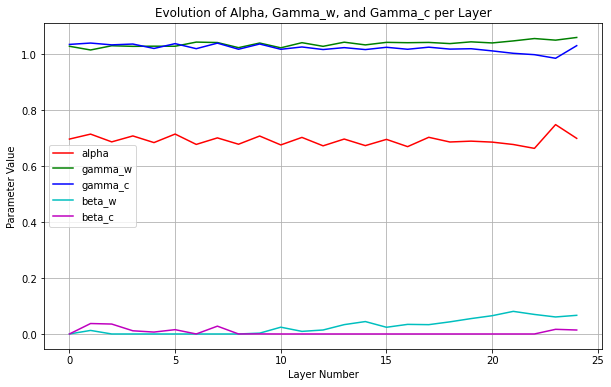

In [35]:
alpha_values = np.array(alpha_values)
gamma_w_values = np.array(gamma_w_values)
gamma_c_values = np.array(gamma_c_values)
beta_w_values = np.array(beta_w_values)
beta_c_values = np.array(beta_c_values)


# Tracer l'évolution des paramètres en fonction du numéro de la couche
num_layers = np.arange(len(alpha_values))

plt.figure(figsize=(10, 6))

# Tracer alpha avec softplus
plt.plot(num_layers, alpha_values, label="alpha", color='r')

# Tracer gamma_w
plt.plot(num_layers, gamma_w_values, label="gamma_w", color='g')

# Tracer gamma_c
plt.plot(num_layers, gamma_c_values, label="gamma_c", color='b')

# Trace beta_w
plt.plot(num_layers, beta_w_values, label='beta_w', color='c')

# Trace beta_c
plt.plot(num_layers, beta_c_values, label='beta_c', color='m')


plt.xlabel("Layer Number")
plt.ylabel("Parameter Value")
plt.title("Evolution of Alpha, Gamma_w, and Gamma_c per Layer")
plt.legend()
plt.grid(True)

# Sauvegarder le graphique
plt.show()

In [9]:
beta_w_values

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

### 1.7- Make table